In [4]:
import seaborn as sns
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('dark_background')
rs = 42 # random state

# Question 1

## | Getting and Processing the Dataset for classification

#### > Get Data

In [5]:
Data = pd.read_csv("heart-disease.csv")

In [6]:
Data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1


In [7]:
## shuffle 
np.random.seed(rs)
Indexes = np.random.permutation(range(Data.shape[0]))
Data = Data.iloc[Indexes]

In [8]:
# CHeck for null value
Data.isna().sum().sum() # no na value 
Data.isnull().sum().sum() # no null value 

0

In [9]:
X = Data.values[:,:-1]
Y = Data.values[:,-1]
X.shape,Y.shape

((303, 13), (303,))

In [10]:
# Balanced 
Counter(Y)

Counter({1.0: 165, 0.0: 138})

#### > Some plots 

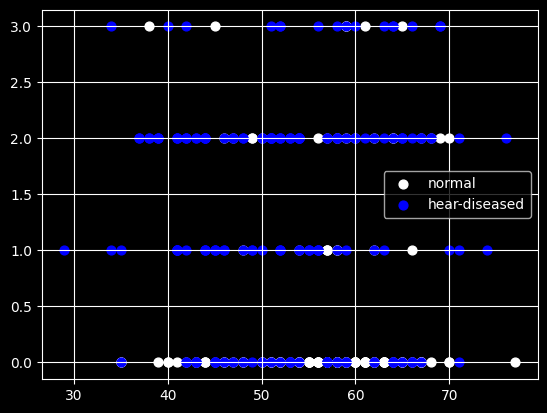

In [11]:
index = np.argwhere(Y==0).reshape(-1,)
Data0 = Data.iloc[index]
plt.scatter(Data0['age'],Data0["cp"],c = "white",s = 40,label = "normal")

index = np.argwhere(Y==1).reshape(-1,)
Data1 = Data.iloc[index]
plt.scatter(Data1['age'],Data1["cp"],c = "blue",s = 40,label = "hear-diseased")

plt.grid()
plt.legend()
plt.show()

#### > scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
np.max(X,axis = 0) , np.min(X,axis = 0)

(array([ 77. ,   1. ,   3. , 200. , 564. ,   1. ,   2. , 202. ,   1. ,
          6.2,   2. ,   4. ,   3. ]),
 array([ 29.,   0.,   0.,  94., 126.,   0.,   0.,  71.,   0.,   0.,   0.,
          0.,   0.]))

In [14]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
np.max(X,axis = 0) , np.min(X,axis = 0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

## | Training 

In [18]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization,Input,Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall,Accuracy,F1Score,Precision,AUC
from tensorflow.keras.losses import MSE,CategoricalCrossentropy,SparseCategoricalCrossentropy,BinaryCrossentropy

In [19]:
configuration = {
    "n_dense_1" : 32,
    "n_dense_2" : 16,
    "n_dense_3" : 8,
    "n_class" : 2,
    "n_feature": 13,
    "activation":"relu",
    "n_epoch" : 250,
    "batch_size":8,
    "lr" : 0.0001
}

### > Build Neural Network ..

In [20]:
def create_Model():
    shape = (configuration["n_feature"],)
    f_in = Input(shape)
    
    x = Dense(configuration["n_dense_1"])(f_in)
    x = Activation(configuration['activation'])(x)
    
    x = Dense(configuration["n_dense_2"])(x)
    x = Activation(configuration['activation'])(x)
    
    x = Dense(configuration["n_dense_3"])(x)
    x = Activation(configuration['activation'])(x)
    
    if( configuration['n_class'] > 2 ):
        x = Dense(configuration["n_class"])(x)
        x = Activation("softmax")(x)
    else:
        x = Dense(1)(x)
        x = Activation("sigmoid")(x)
        
    my_model = Model(inputs = f_in ,outputs = x)
    # my_model.summary()
    return my_model
my_model = create_Model()

### > Training 

In [21]:
metrics_ = ['accuracy',]
my_model.compile(
    optimizer = Adam(configuration["lr"]),
    loss = BinaryCrossentropy(),
    metrics = metrics_,
)

In [22]:
## Note :: that my_model dont shuffle before doing validation split  
history = my_model.fit( X,Y.reshape(-1,1)
                         ,batch_size=configuration["batch_size"]
                        ,epochs = configuration["n_epoch"]
                         ,verbose = 1
                        ,validation_split=0.2,
                        )

Epoch 1/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.3950 - loss: 0.7001 - val_accuracy: 0.4918 - val_loss: 0.6806
Epoch 2/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4363 - loss: 0.6900 - val_accuracy: 0.5082 - val_loss: 0.6764
Epoch 3/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5009 - loss: 0.6825 - val_accuracy: 0.5246 - val_loss: 0.6720
Epoch 4/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5071 - loss: 0.6823 - val_accuracy: 0.5902 - val_loss: 0.6682
Epoch 5/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5539 - loss: 0.6784 - val_accuracy: 0.6393 - val_loss: 0.6642
Epoch 6/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6594 - loss: 0.6740 - val_accuracy: 0.7213 - val_loss: 0.6605
Epoch 7/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7024 - loss: 0.6688 - val_accuracy: 0.7213 - val_loss: 0.6571
Epoch 8/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7493 - loss: 0.6612 - val_accuracy: 0.7869 - 

#### > Plot for Loss and Accuracy On Train and Validation Data

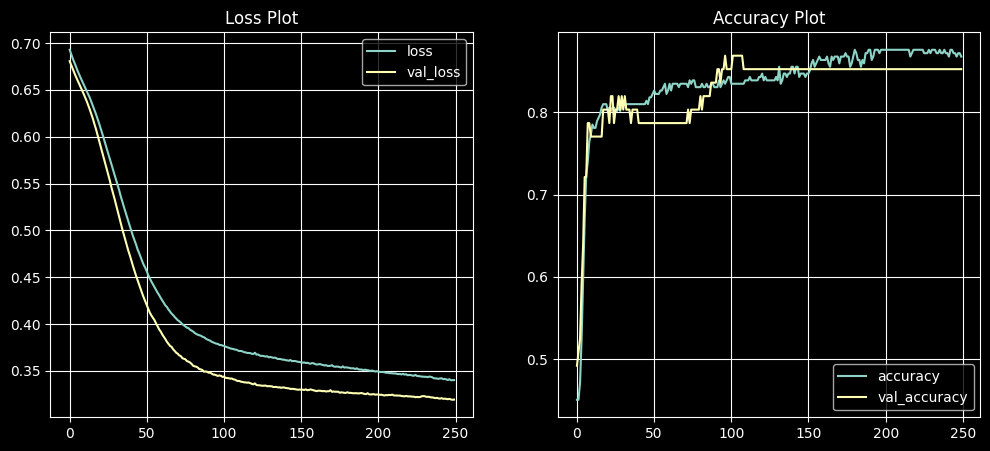

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.grid()
plt.legend()
plt.title("Loss Plot")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = "val_accuracy")
plt.grid()
plt.legend()
plt.title("Accuracy Plot")
plt.show()

### > Model Evaluation

In [28]:
Y_pred = my_model.predict(X)
Y_pred = np.array(Y_pred>0.5,dtype = 'float')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


#### > Confusion Matrix 

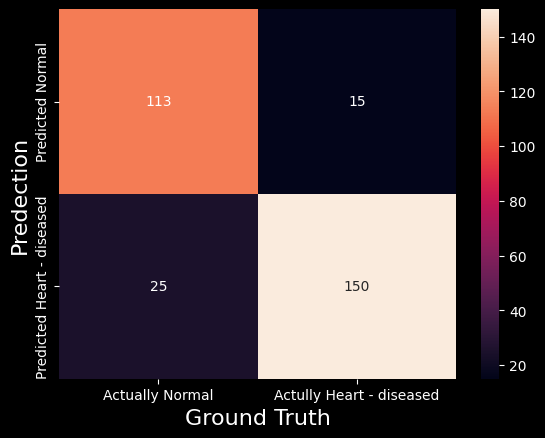

In [29]:
matrix = tf.math.confusion_matrix(Y_pred,Y)
sns.heatmap(matrix,annot=True,fmt = ".0f"
            ,xticklabels=["Actually Normal","Actully Heart - diseased"]
            ,yticklabels=["Predicted Normal","Predicted Heart - diseased"], )
plt.xlabel("Ground Truth",fontsize = 16)
plt.ylabel("Predection",fontsize = 16)
plt.show()

#### > Classification Report

In [30]:
from sklearn.metrics import classification_report
report = classification_report(Y,Y_pred,output_dict=True,target_names = ["Normal","Heart-diseased"])
pd.DataFrame(report)

,Normal,Heart-diseased,accuracy,macro avg,weighted avg
precision,0.882812,0.857143,0.867987,0.869978,0.868834
recall,0.818841,0.909091,0.867987,0.863966,0.867987
f1-score,0.849624,0.882353,0.867987,0.865989,0.867447
support,138.000000,165.000000,0.867987,303.000000,303.000000


# Question 2

In [31]:
matrix = np.array([[27,5,2],[10,7,0],[2,0,31]]) #  x = Prediction vs y = Actual
matrix

array([[27,  5,  2],
       [10,  7,  0],
       [ 2,  0, 31]])

In [32]:
def Get_Report(matrix):
    n_class = matrix.shape[0]
    
    labels = ['Count','Accuracy','Recall','Precision','F1-score','TP',"TN","FP","FN"]
    Report = pd.DataFrame([[0]*len(labels) for i in range(n_class+2)],
                      columns = labels,dtype="float") 
    for i in range(n_class):
        tp_fn , tp_fp = matrix[i,:].sum() , matrix[:,i].sum()
        tp_fp_fn_tn = matrix.sum()                   # Total Element .
        tp = matrix[i,i]                             # True Positive
        fp , fn = tp_fp-tp , tp_fn-tp                # false Positive & negative
        tn = tp_fp_fn_tn - tp_fn - tp_fp + tp        # true negative
        Report.iloc[i,0] = tp_fn                     # Total elements in class
        Report.iloc[i,1] = (tp+tn)/tp_fp_fn_tn       # accuracy
        Report.iloc[i,2:4] = [ tp/tp_fn , tp/tp_fp ] # Recall & Precision
        Report.iloc[i,4] = 2*tp/(tp_fn + tp_fp)      # f1 - score.
        Report.iloc[i,5:9] = [tp,tn,fp,fn]          
    
    # Adding Averages..
    Report.iloc[n_class] = (Report.iloc[:n_class]).mean(axis = 0)
    
    count_sum = Report.iloc[:n_class,0].sum()
    Report.iloc[n_class+1] = (((Report.iloc[:n_class,0]).T)@(Report.iloc[:n_class]))
    Report.iloc[n_class+1] /= count_sum
    
    Report.insert(0, column = "One vs Rest",
                  value=[i for i in range(n_class)] + ["average","w_average",])
    
    # Changing Dtypes. 
    Report[["Count","TP",'FP','FN','TN']] =  Report[["Count","TP",'FP','FN','TN']].astype(int)
    
    ## Note : One Vs Rest Average Accuracy is same as 0.5 + 0.5*actual_accuracy
    return Report

In [33]:
Get_Report(matrix)

,One vs Rest,Count,Accuracy,Recall,Precision,F1-score,TP,TN,FP,FN
0,0,34,0.773810,0.794118,0.692308,0.739726,27,38,12,7
1,1,17,0.821429,0.411765,0.583333,0.482759,7,62,5,10
2,2,33,0.952381,0.939394,0.939394,0.939394,31,49,2,2
3,average,28,0.849206,0.715092,0.738345,0.720626,21,49,6,6
4,w_average,30,0.853600,0.773810,0.767323,0.766162,24,47,6,5
